**OBJECTIVE**

 Develop an effective fraud detection systems for Fastag transactions.
 Create robust model that can accurately identify instances of fradulant activity, ensuring activity the integrity and security of Fastag transactions.

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:

# Loading the dataset
df = pd.read_csv('FastagFraudDetection.csv')

In [4]:
print(df.head())

   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292  

**DATA EXPLORATION**

In [5]:

# Dimension of dataset
df.shape

(5000, 13)

In [6]:


# Summary statistics of dataset
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [7]:

# Check for missing values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [8]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [19]:


# drop missing values
df = df.dropna(subset=['FastagID'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         4451 non-null   int64 
 1   Timestamp              4451 non-null   object
 2   Vehicle_Type           4451 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            4451 non-null   object
 5   Lane_Type              4451 non-null   object
 6   Vehicle_Dimensions     4451 non-null   object
 7   Transaction_Amount     4451 non-null   int64 
 8   Amount_paid            4451 non-null   int64 
 9   Geographical_Location  4451 non-null   object
 10  Vehicle_Speed          4451 non-null   int64 
 11  Vehicle_Plate_Number   4451 non-null   object
 12  Fraud_indicator        4451 non-null   object
dtypes: int64(4), object(9)
memory usage: 486.8+ KB


**EXPLANATORY ANALYSIS**

C:\Users\Rahul Raj\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rahul Raj\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rahul Raj\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


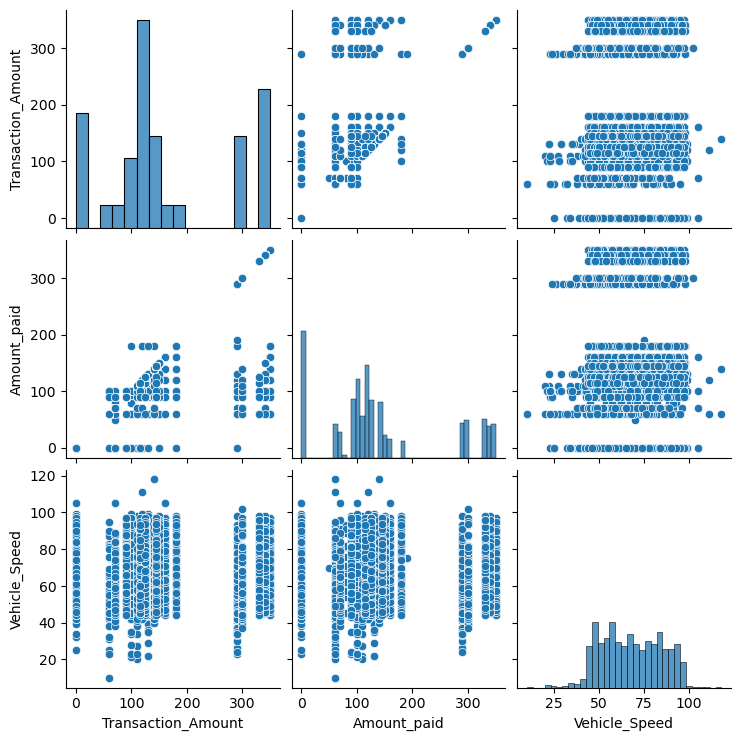

In [9]:


#
sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

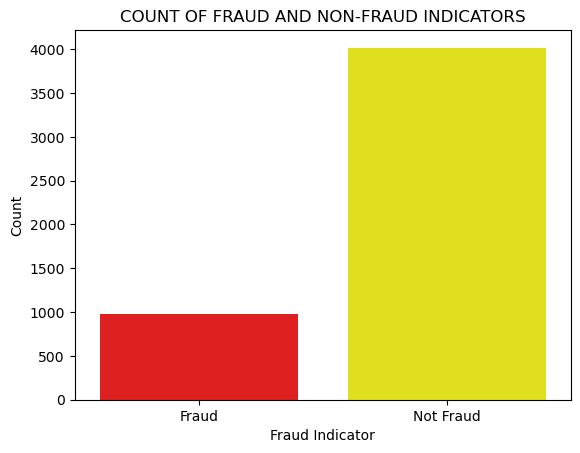

In [10]:


# Count of Fraud and Non-Fraud in 'Fraud_ndicators'
sns.countplot(x='Fraud_indicator', data=df, palette=['red', 'yellow'])
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.title('COUNT OF FRAUD AND NON-FRAUD INDICATORS')
plt.show()

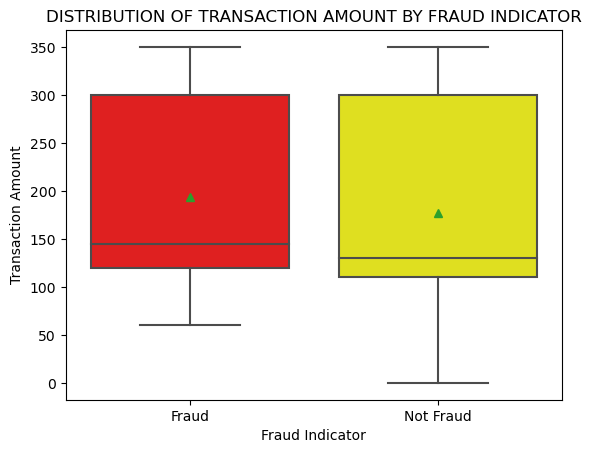

In [24]:


# Boxplot of 'Transaction_Amount' by Fraud and Non-Fraud

sns.boxplot(
    x = 'Fraud_indicator',
    y = 'Transaction_Amount',
    showmeans = True,
    data = df,
    palette = ['red', 'yellow']
)

plt.xlabel('Fraud Indicator')
plt.ylabel('Transaction Amount')
plt.title('DISTRIBUTION OF TRANSACTION AMOUNT BY FRAUD INDICATOR')
plt.show()

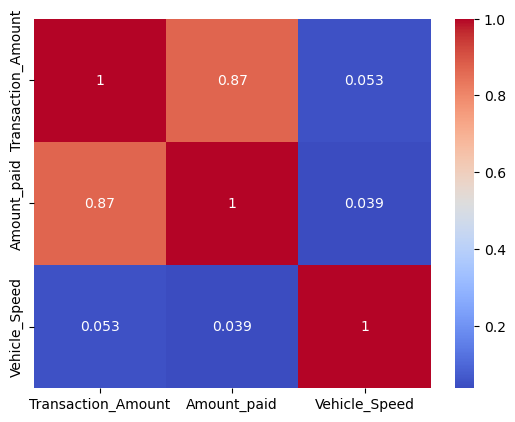

In [11]:


# Correlation matrix and heat map for numerical variables
corr_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**FEATURE ENGINEERING**

In [12]:
# convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [13]:
# Extract date and time features
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute

In [14]:


# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])
df['Lane_Type'] = label_encoder.fit_transform(df['Lane_Type'])
df['Geographical_Location'] = label_encoder.fit_transform(df['Geographical_Location'])

In [15]:



# Drop Unnecessary columns
df.drop(['Transaction_ID', 'Timestamp', 'FastagID', 'TollBoothID', 'Vehicle_Dimensions', 'Vehicle_Plate_Number'], axis=1, inplace=True)

In [16]:

# save this engineered data
df.to_csv('engineered_fastag_data.csv', index=False)

**MODEL DEVELOPMENT**

In [17]:
# Split the dataset into features(X) and target variable (y)
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Intialize the Random Forest Classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the Evaluation metrics
print('Accuracy :', accuracy)
print('Confusion Matrix :\n',conf_matrix)
print('Classification_Report :\n', class_report)

Accuracy : 0.982
Confusion Matrix :
 [[199  18]
 [  0 783]]
Classification_Report :
               precision    recall  f1-score   support

       Fraud       1.00      0.92      0.96       217
   Not Fraud       0.98      1.00      0.99       783

    accuracy                           0.98      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.98      0.98      0.98      1000



**REAL-TIME FRAUD DETECTION**

In [ ]:
import joblib
import time

# Loading historical dataset (engineered_data)
historical_data = pd.read_csv('engineered_fastag_data.csv')

# Seperate features and target variables
X = historical_data.drop('Fraud_indicator', axis=1)
y = historical_data['Fraud_indicator']

# Initialize the model
model = RandomForestClassifier()

# Train the model on historical data
model.fit(X, y)

# Save the trained model
joblib.dump(model, 'fastag_fraud_detection_pkl')

# Simulate real-time data arrival
while True:
    new_data = pd.read_csv('engineered_fastag_data.csv')

    X_new = new_data.drop('Fraud_indicator', axis=1)

    fraud_predictions = model.predict(X_new)

    print('New data processed. Predicted fraud Status :', fraud_predictions)

    # Wait for a specific time interval before processing next batch of data
    time.sleep(60)

New data processed. Predicted fraud Status : ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud Status : ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud Status : ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud Status : ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud Status : ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud Status : ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud Status : ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud Status : ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
New data processed. Predicted fraud Status : ['Fraud' 'Fraud' 'Not Fraud' ... 'Not Fraud' 'Not Fraud' 'Fraud']
N